In [39]:
import pandas as pd 

df = pd.read_csv("real_train.csv")

df["계약년월"]

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1118817    200707
1118818    200708
1118819    200708
1118820    200709
1118821    200701
Name: 계약년월, Length: 1118822, dtype: int64

In [ ]:

#그룹 필터링 (2개 이상 데이터만)
group_sizes = df.groupby(["아파트명", "계약년월"]).size()
valid_groups = group_sizes[group_sizes >= 2].index
valid_groups


MultiIndex([(   '2차한양', 200706),
            (   '2차한양', 200707),
            (   '2차한양', 200709),
            (   '2차한양', 200710),
            (   '2차한양', 200712),
            (   '2차한양', 200802),
            (   '2차한양', 200803),
            (   '2차한양', 200804),
            (   '2차한양', 200805),
            (   '2차한양', 200901),
            ...
            ('힐탑트레져1동', 201603),
            ('힐탑트레져1동', 202010),
            (     '힐튼', 200705),
            (     '힐튼', 200710),
            ('힐튼빌리지1차', 200704),
            (   '힐하우스', 200703),
            (   '힐하우스', 200801),
            (   '힐하우스', 200908),
            (   '힐하우스', 200909),
            (   '힐하우스', 201003)],
           names=['아파트명', '계약년월'], length=168499)

In [ ]:
#유효 그룹만 필터링
df_valid = df.set_index(["아파트명", "계약년월"]).loc[valid_groups].reset_index()
# 5. 정렬
df_valid = df_valid.sort_values(by=["아파트명","계약년월", "target"])

df_valid



In [ ]:
#변화율 계산
df_valid["이전_target"] = df_valid.groupby(["아파트명", "전용면적(㎡)"])["target"].shift(1)
df_valid["변화율"] = (df_valid["target"] - df_valid["이전_target"]) / df_valid["이전_target"]
df_valid["급락"] = df_valid["변화율"] < -0.4 #원하는 기준 있으시면 바꿔주세요!

#급락한 데이터만 추출
df_drop = df_valid[df_valid["급락"]]

down_list = df_drop[["아파트명", "전용면적(㎡)"]].drop_duplicates().to_records(index=False)
down_list = list(down_list)



In [ ]:
df_valid[df_valid["급락"] == True].head()

In [ ]:
#급락 제거
df_valid = df_valid[df_valid["급락"] != True]

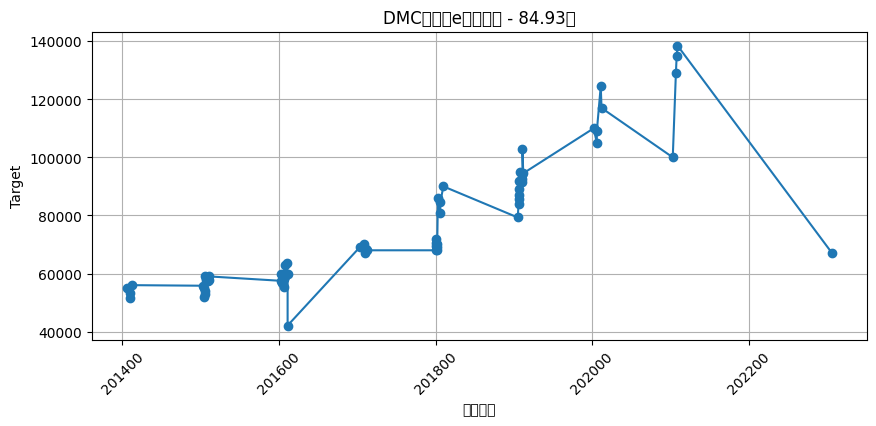

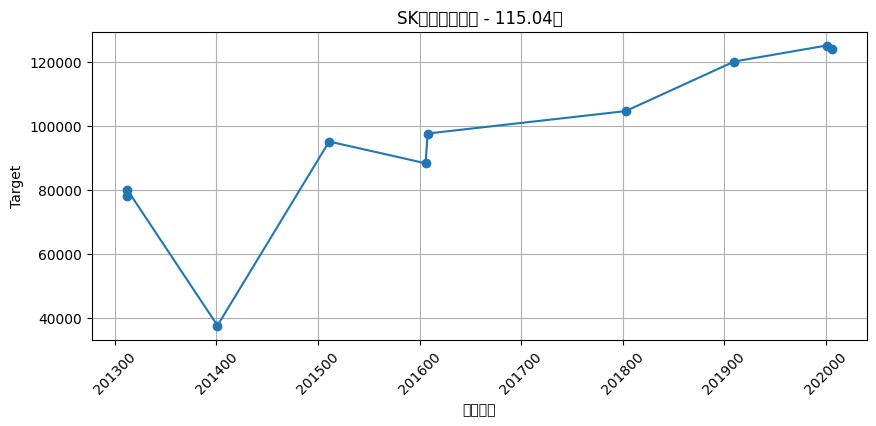

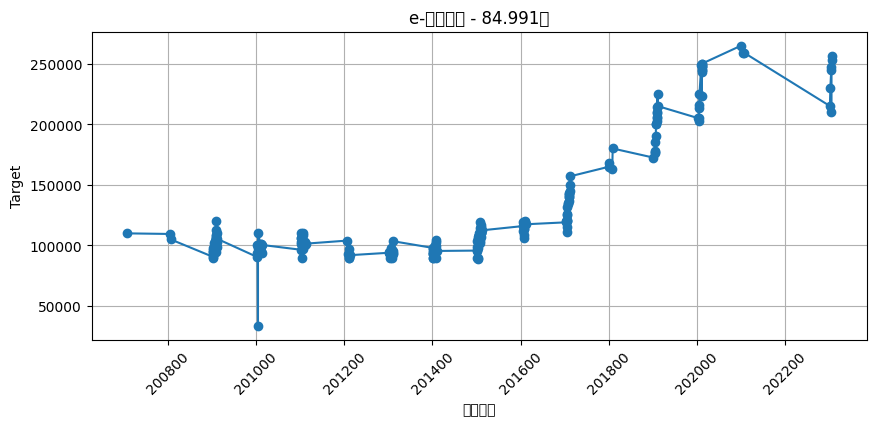

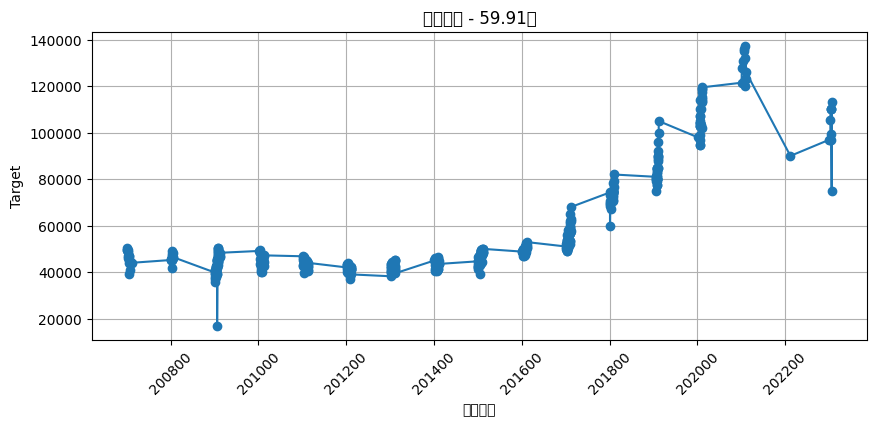

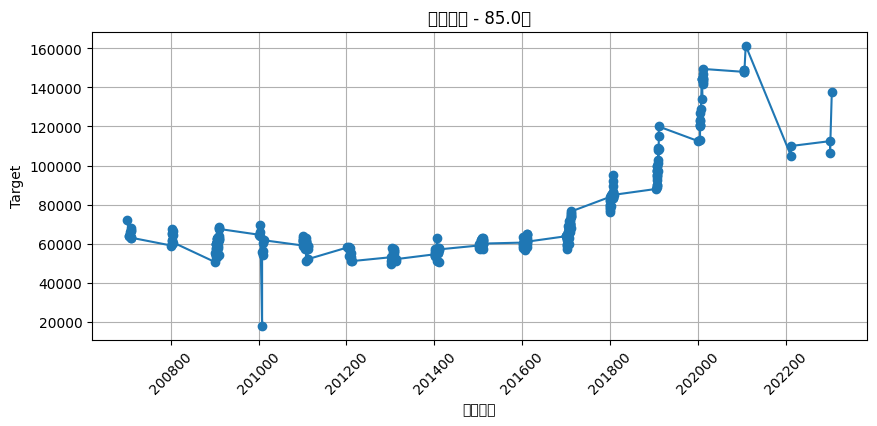

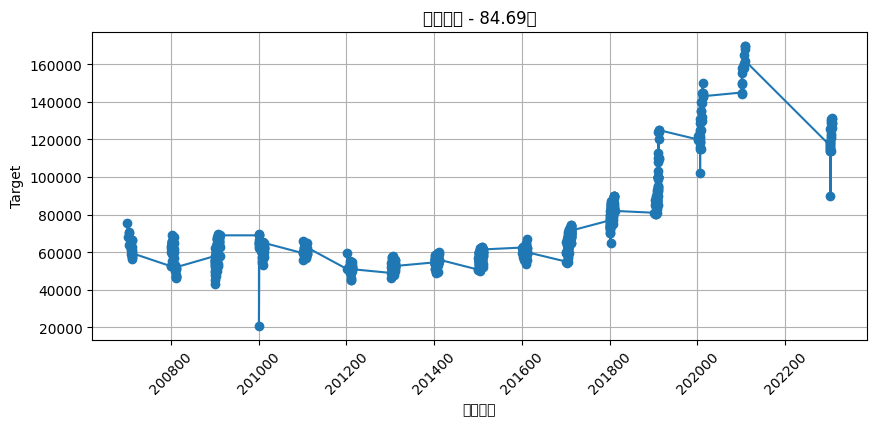

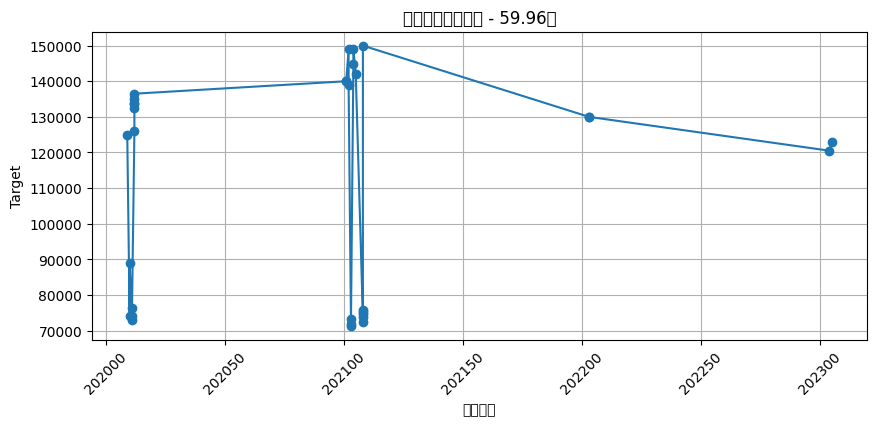

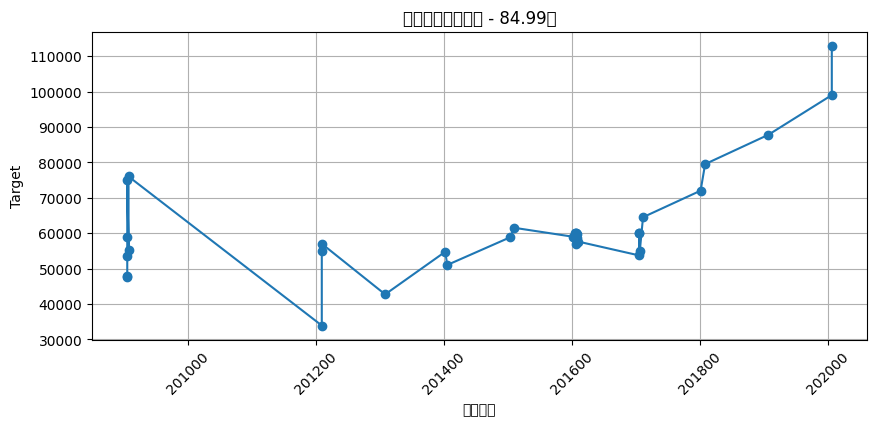

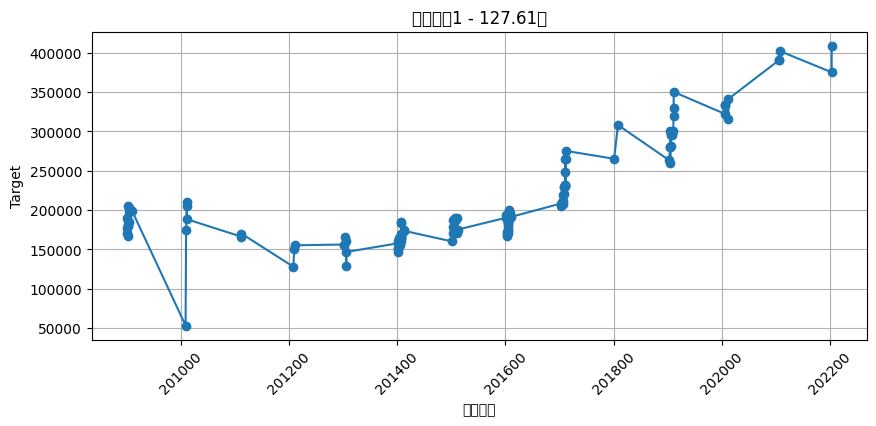

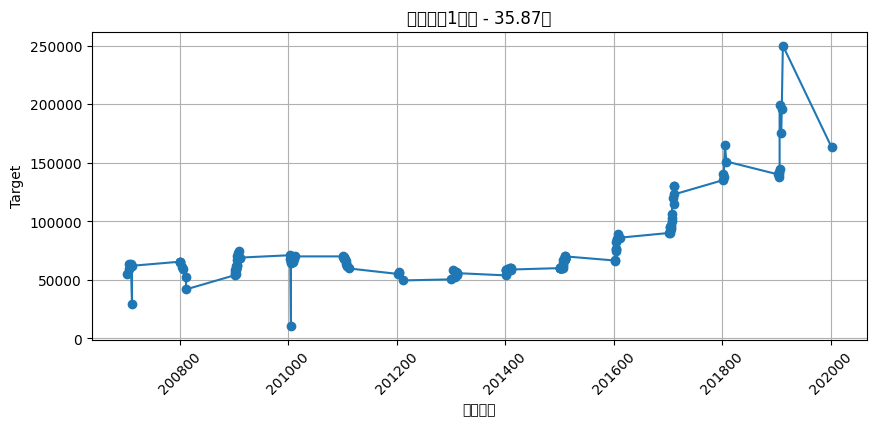

In [43]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

for apt_name, area in down_list[:10]:  # 앞에서 10개만
    sub_df = df_valid[(df_valid["아파트명"] == apt_name) & (df_valid["전용면적(㎡)"] == area)]
    sub_df = sub_df.sort_values("계약년월")

    plt.figure(figsize=(10, 4))
    plt.plot(sub_df["계약년월"], sub_df["target"], marker='o')
    plt.title(f"{apt_name} - {area}㎡")
    plt.xlabel("계약년월")
    plt.ylabel("Target")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()